# Analytics Edge Final Project: Nidhish Nerur, Angel Xie, Brimar Olafsson, Yuki Yu, and James Pinter

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Part 1: Exploratory Data Analysis

In [3]:
#Read in dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
#View first 5 rows of the dataframe
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
#6607 observations with 20 columns
df.shape

(6607, 20)

In [5]:
#Range of features including family background, school engagement, and extracurricular activity
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
#Overview of feature datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
#We need to handle missing values in Teacher_Quality, Parental_Education_Level, Distance_from_Home
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
#Summary statistics for numeric columns
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


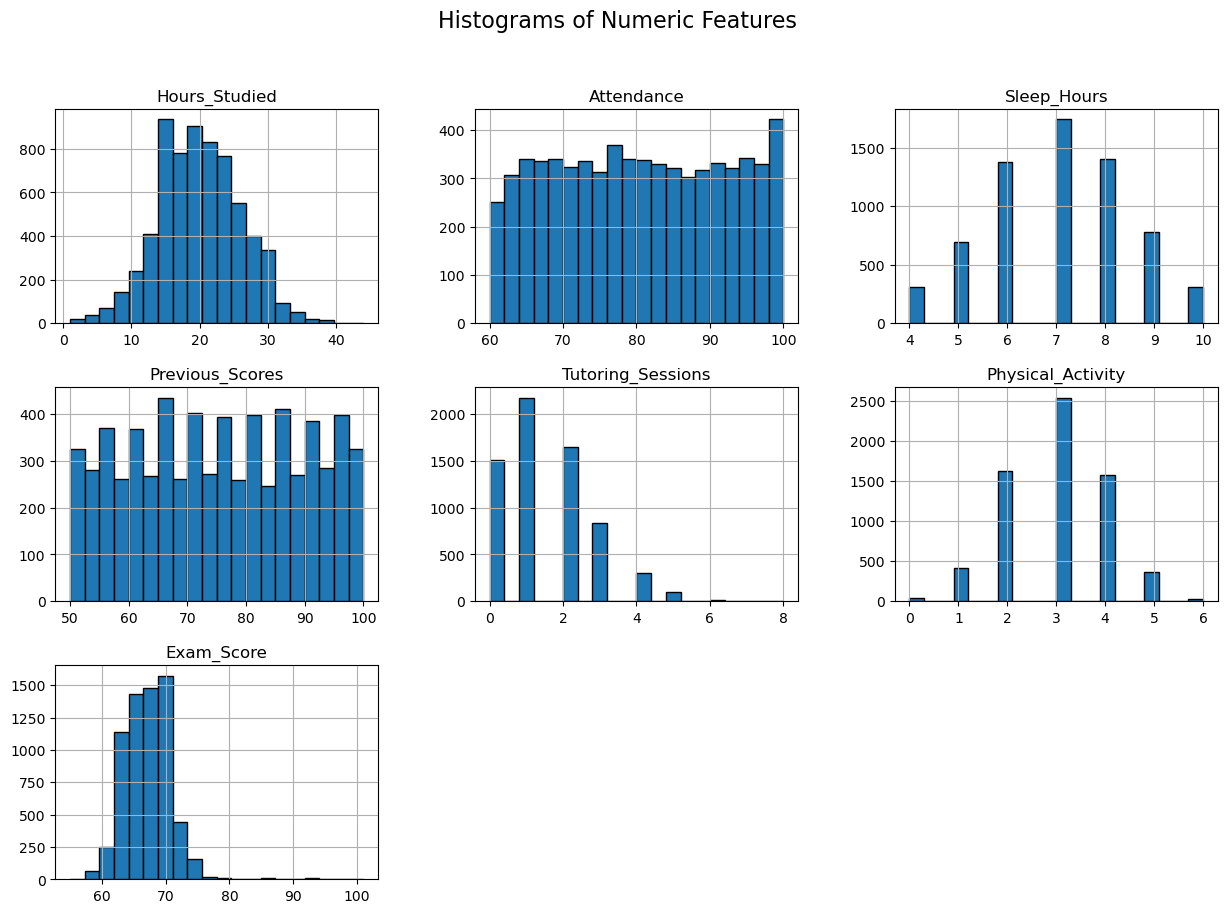

In [9]:
#Extract numeric columns and visualize histograms
numeric_col = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]]

#We are interested in predicting Exam_Score and we plan to bin this feature into categorical ranges
numeric_col.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

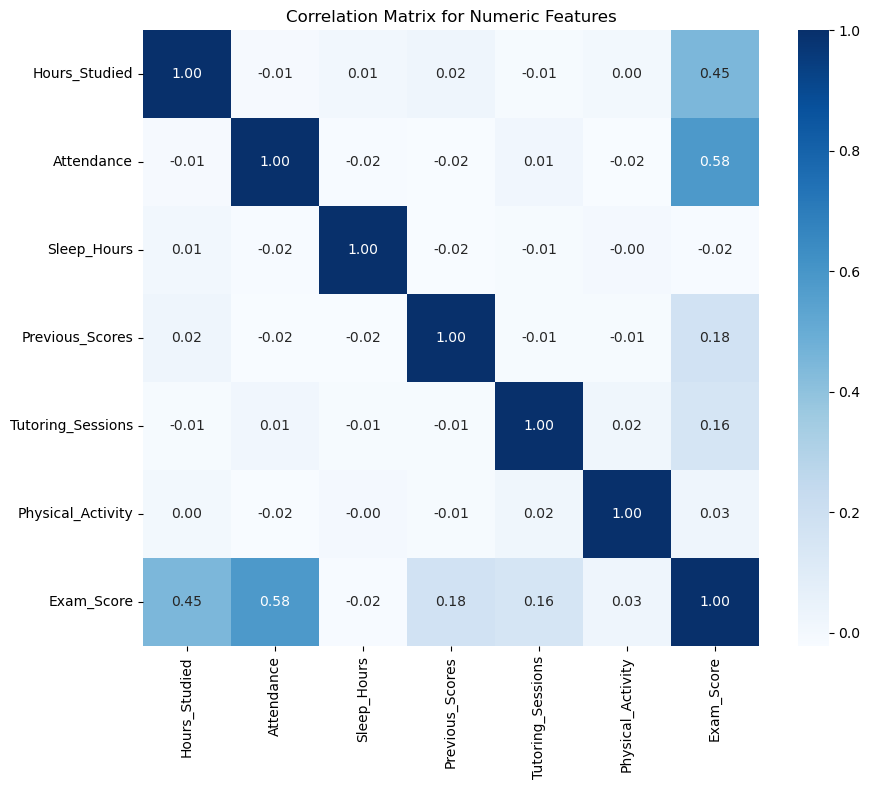

In [10]:
#Compute the correlation matrix
corr_matrix = numeric_col.corr()

#Create a heatmap using Seaborn
#There does not appear to be risk of multicollinearity 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

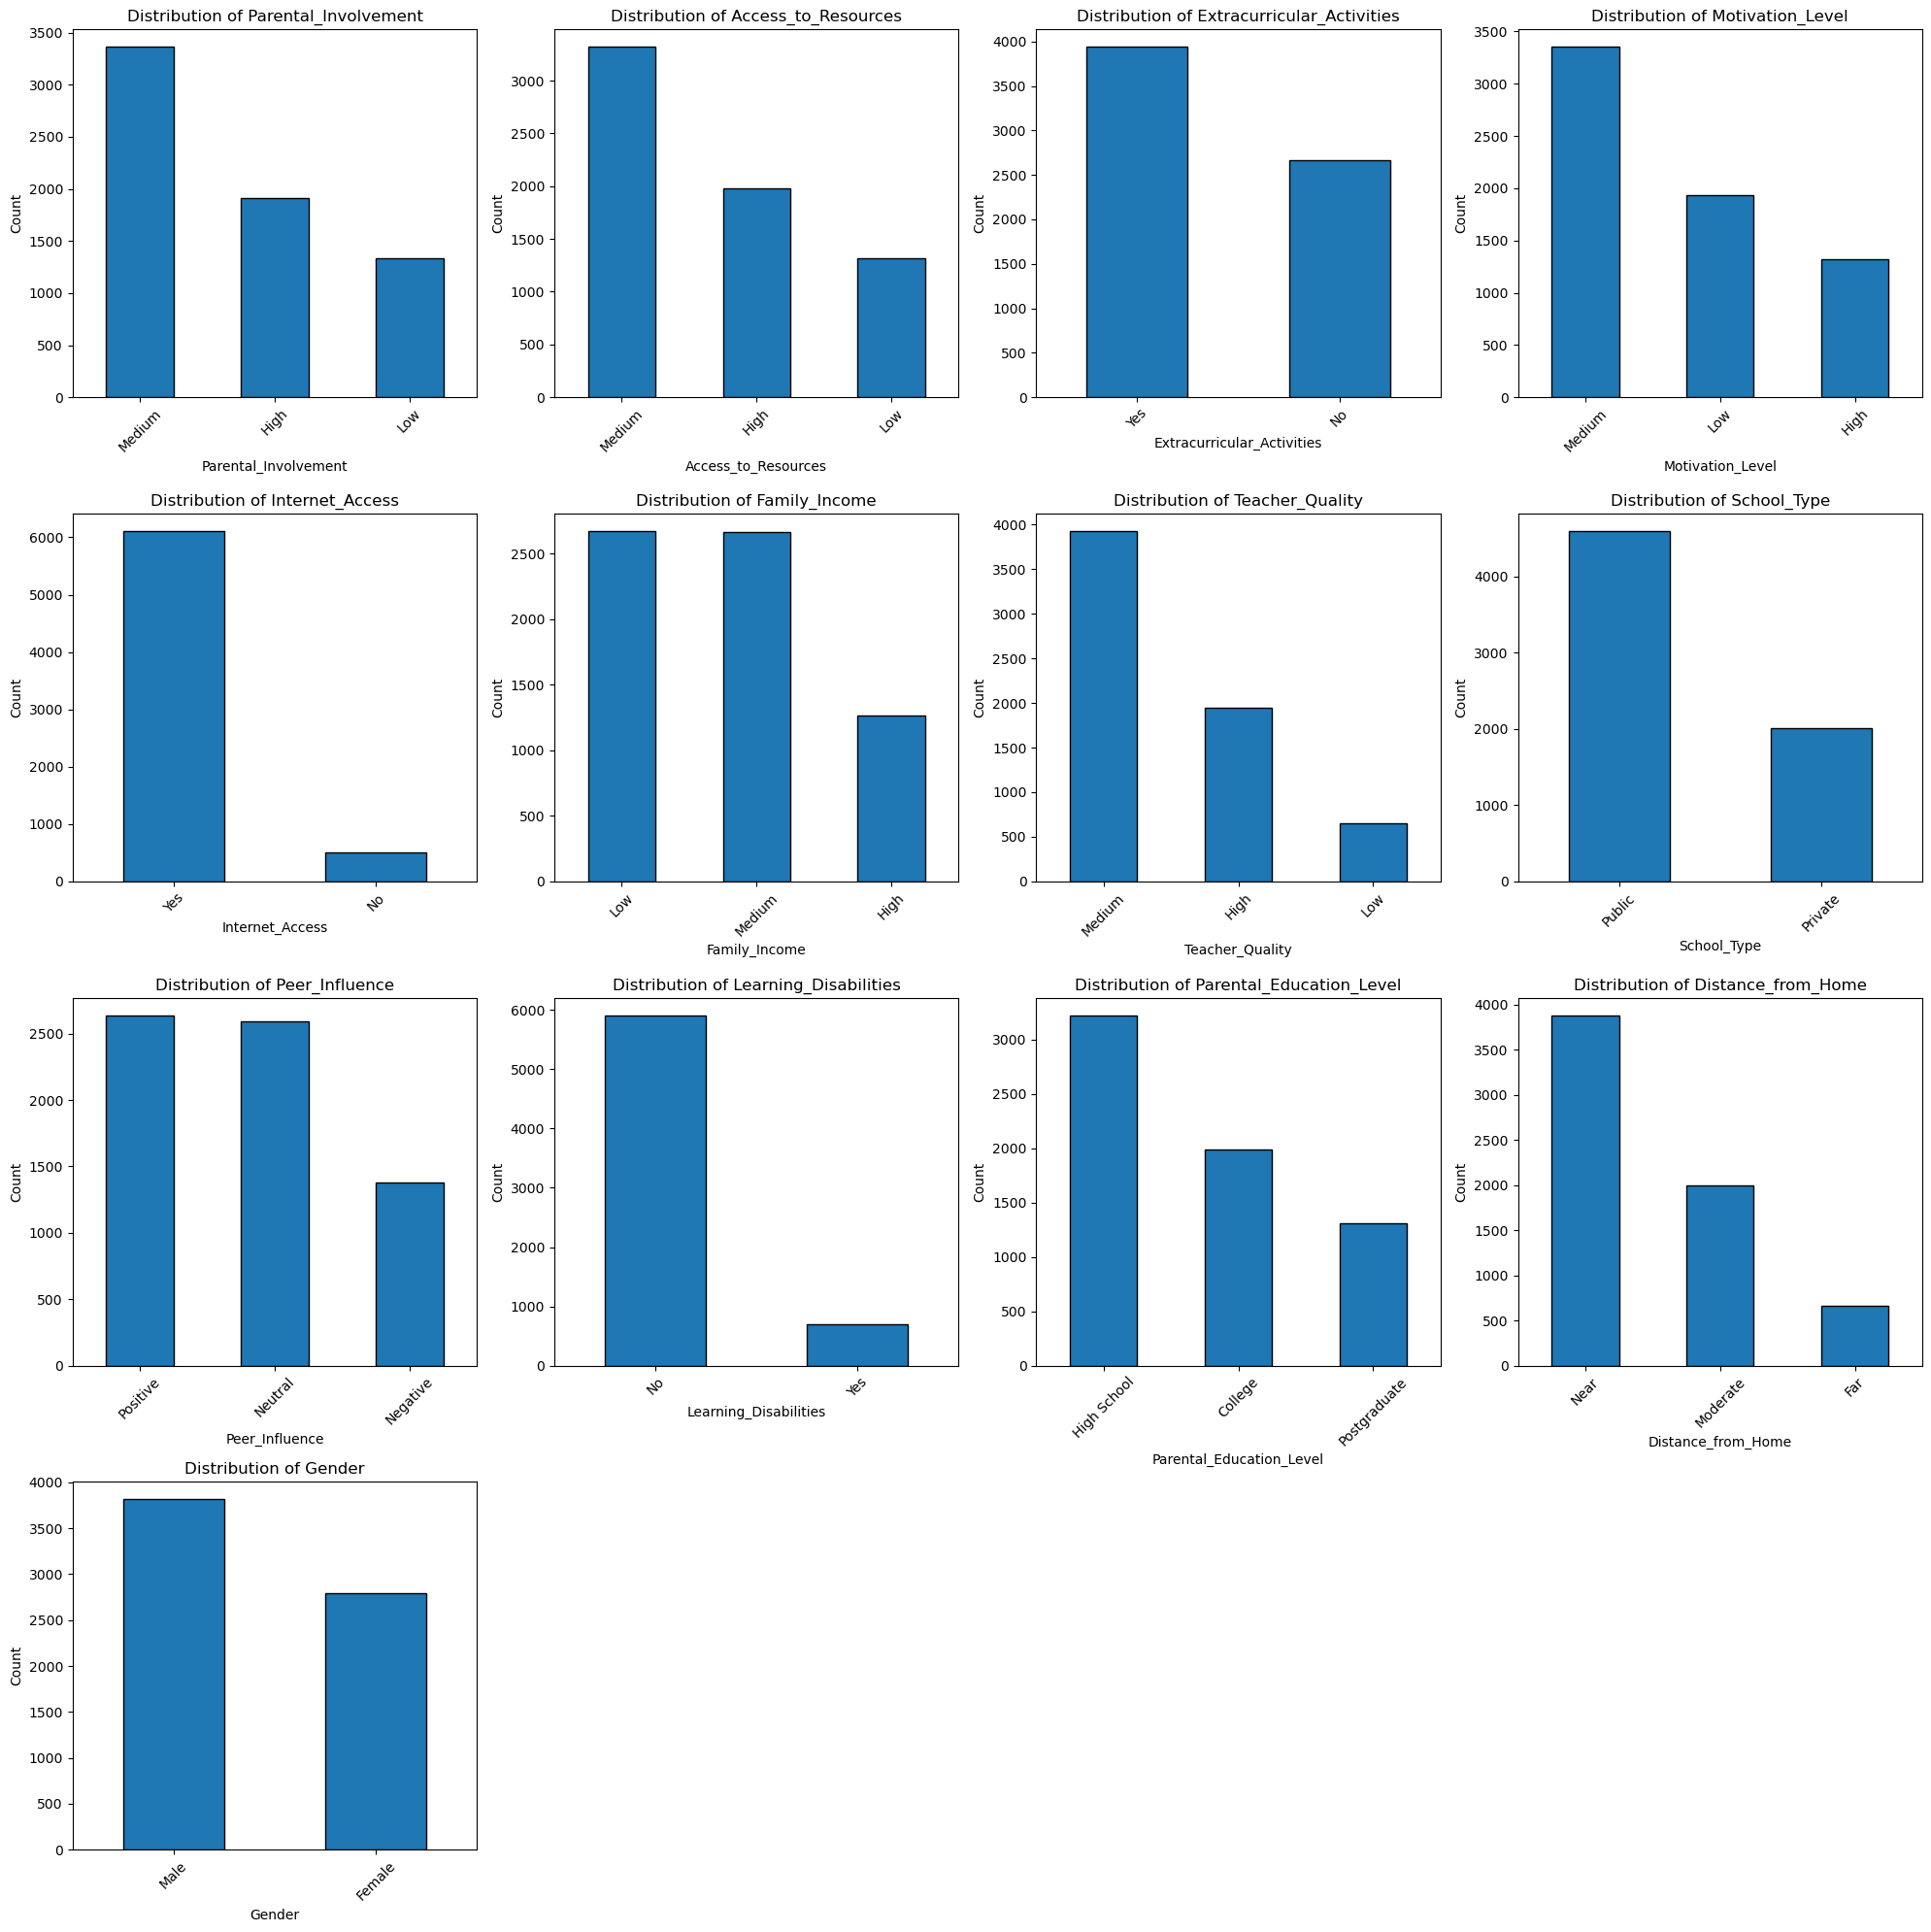

In [11]:
#Extract categorical variables and plot bar graphs
cat_col = df[[
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities", 
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]]

#Set up a grid for subplots
num_plots = len(cat_col.columns)
#Calculate rows to fit 4 columns per row
nrows = (num_plots + 3) // 4  
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, 5 * nrows))
axes = axes.flatten()

#Create bar plots for each categorical feature
for i, column in enumerate(cat_col.columns):
    cat_col[column].value_counts().plot(
        kind='bar', ax=axes[i], edgecolor='black'
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Part 2: Feature Engineering and Data Preprocessing

Data Preparation Steps
1. Map ordinal categorical features to numeric values
2. Create new features based on existing ones that seem relevant for our task 
3. Remove irrelevant variables in predicting `Exam_Score`
4. Handle missing values
5. Scale the numeric features so they are standardized
6. Apply one-hot encoding for categorical features

CATEGORICAL PREDICTION TASK: <br>
7. Bin the `Exam_Score` field into roughly equal groupings

In [12]:
#Define mapping dictionary
mapping = {"Low": 1, "Medium": 2, "High": 3}

#Apply the mapping to the columns that have natural ordering 
df["Parental_Involvement_Mapped"] = df["Parental_Involvement"].map(mapping)
df["Access_to_Resources_Mapped"] = df["Access_to_Resources"].map(mapping)
df["Motivation_Level_Mapped"] = df["Motivation_Level"].map(mapping)
df["Family_Income_Mapped"] = df["Family_Income"].map(mapping)
df["Teacher_Quality_Mapped"] = df["Teacher_Quality"].map(mapping)

#Define distance mapping dictionary
distance_mapping = {"Near": 1, "Moderate": 2, "Far": 3}
#Apply mapping to ordered distance column
df["Distance_from_Home_Mapped"] = df["Distance_from_Home"].map(distance_mapping)

#Define education mapping
education_mapping = {"High School": 1, "College": 2, "Postgraduate": 3}
#Apply the mapping to the education column 
df["Parental_Education_Level_Mapped"] = df["Parental_Education_Level"].map(education_mapping)

In [13]:
#Feature engineering, create new features based on existing ones
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Parental_Involvement_Mapped',
       'Access_to_Resources_Mapped', 'Motivation_Level_Mapped',
       'Family_Income_Mapped', 'Teacher_Quality_Mapped',
       'Distance_from_Home_Mapped', 'Parental_Education_Level_Mapped'],
      dtype='object')

In [14]:
#Create relevant interactions terms
#Interaction between hours studied and class attendance
df["Class_Engagement"] = df["Hours_Studied"] * df["Attendance"]

#Interaction between parental involvement and access to resources
df["Home_Support"] = df["Parental_Involvement_Mapped"] * df["Access_to_Resources_Mapped"]

#Interaction between motivation level and tutoring sessions
df["Learning_Engagement"] = df["Motivation_Level_Mapped"] * df["Tutoring_Sessions"]

In [15]:
#Ratio of hours studied to sleep
df["Study_Sleep_Ratio"] = df["Hours_Studied"] / df["Sleep_Hours"]

In [16]:
#Balance of physical activity and sleep levels
df["Health_Balance"] = df["Physical_Activity"] + df["Sleep_Hours"]

In [17]:
#Remove variables
df = df.drop(columns = ["Parental_Involvement", "Access_to_Resources", 
                        "Motivation_Level", "Family_Income", "Teacher_Quality",
                       "Distance_from_Home", "Parental_Education_Level"])

In [18]:
#Handle missing values 
#Selecting the categorical fields for imputation
cat_fields = ["Parental_Education_Level_Mapped", "Teacher_Quality_Mapped", "Distance_from_Home_Mapped"]

#Impute categorical columns with mode 
for col in cat_fields:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
#No missing values now 
df.isna().sum()

Hours_Studied                      0
Attendance                         0
Extracurricular_Activities         0
Sleep_Hours                        0
Previous_Scores                    0
Internet_Access                    0
Tutoring_Sessions                  0
School_Type                        0
Peer_Influence                     0
Physical_Activity                  0
Learning_Disabilities              0
Gender                             0
Exam_Score                         0
Parental_Involvement_Mapped        0
Access_to_Resources_Mapped         0
Motivation_Level_Mapped            0
Family_Income_Mapped               0
Teacher_Quality_Mapped             0
Distance_from_Home_Mapped          0
Parental_Education_Level_Mapped    0
Class_Engagement                   0
Home_Support                       0
Learning_Engagement                0
Study_Sleep_Ratio                  0
Health_Balance                     0
dtype: int64

In [20]:
#Standardize numeric features
#List of numeric features 
numeric_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
                   "Tutoring_Sessions", "Physical_Activity", "Class_Engagement", 
                   "Home_Support", "Learning_Engagement", "Study_Sleep_Ratio",
                   "Health_Balance"]

#Standardize the numeric features including the outcome variable
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [21]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Sleep_Hours', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities', 'Gender', 'Exam_Score',
       'Parental_Involvement_Mapped', 'Access_to_Resources_Mapped',
       'Motivation_Level_Mapped', 'Family_Income_Mapped',
       'Teacher_Quality_Mapped', 'Distance_from_Home_Mapped',
       'Parental_Education_Level_Mapped', 'Class_Engagement', 'Home_Support',
       'Learning_Engagement', 'Study_Sleep_Ratio', 'Health_Balance'],
      dtype='object')

In [22]:
#Apply one-hot encoding for remaining categorical features
categorical_columns = ["Extracurricular_Activities", "Internet_Access",
                      "School_Type", "Peer_Influence", "Learning_Disabilities",
                      "Gender"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype = int)

In [23]:
#Move "Exam_Score" to the last column
columns = [col for col in df.columns if col != "Exam_Score"]  
columns.append("Exam_Score")  
df = df[columns] 

## Bin Exam_Score Only for Categorical Prediction Task

In [24]:
#Define quantile-based bins and labels
quantile_bins = [0, 0.25, 0.5, 0.75, 1]  
labels = ["Low", "Average", "Good", "Excellent"]

#Create a new column with quantile-based binned scores
df["Exam_Score_Binned"] = pd.qcut(df["Exam_Score"], q=4, labels=labels)


In [25]:
#Creates roughly even bins using percentiles 
df["Exam_Score_Binned"].value_counts()

Exam_Score_Binned
Low          2131
Excellent    1625
Average      1468
Good         1383
Name: count, dtype: int64

In [26]:
#Define exam score bin mapping dictionary
mapping = {"Low": 0, "Average": 1, "Good": 2, "Excellent": 3}

#Apply the mapping to the target
df["Exam_Score_Binned"] = df["Exam_Score_Binned"].map(mapping).astype(int)

In [48]:
df.to_csv("df_edge_clean.csv", index = True)

## Part 3: Create train/test split

In [27]:
#Regression task train/test split
X_reg = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_reg = df["Exam_Score"]

#Perform an 80/20 train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [28]:
#Categorical task train/test split
X_ct = df.drop(columns = ["Exam_Score", "Exam_Score_Binned"])
y_ct = df["Exam_Score_Binned"]

#Perform an 80/20 train-test split
X_ct_train, X_ct_test, y_ct_train, y_ct_test = train_test_split(X_ct, y_ct, stratify = y_ct, test_size=0.2, random_state=42)


## Part 4a: Model Development (Regression)

In [29]:
#List to store all models
models_reg = []

#Linear Regression
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)
models_reg.append(("Linear Regression", lr))


In [30]:
#Regression Tree (CART)
reg_cart = DecisionTreeRegressor(random_state=42)
reg_cart.fit(X_reg_train, y_reg_train)
models_reg.append(("Regression Tree (CART)", reg_cart))

In [31]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_reg_train, y_reg_train)
models_reg.append(("Random Forest", rf))

In [32]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_reg_train, y_reg_train)
models_reg.append(("XGBoost", xgb))

In [33]:
#Convert train/test data to tensors for PyTorch
X_train_tensor = torch.tensor(X_reg_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_reg_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_reg_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_reg_test.values, dtype=torch.float32).view(-1, 1)

#PyTorch Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  #Hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  #Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

#Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
nn_model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01)

#Train the neural network
epochs = 100
for epoch in range(epochs):
    nn_model.train()
    optimizer.zero_grad()
    outputs = nn_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

#Add PyTorch model to the list
models_reg.append(("Neural Network (PyTorch)", nn_model))

## Part 4b: Model Development (Classification)

In [34]:
#List to store all models
models_cat = []
#Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_ct_train, y_ct_train)
models_cat.append(("Logistic Regression", lr))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#CART Classification Tree
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_ct_train, y_ct_train)
models_cat.append(("CART Classification Tree", cart))

In [36]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_ct_train, y_ct_train)
models_cat.append(("Random Forest Classifier", rf))

In [37]:
#XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_ct_train, y_ct_train)
models_cat.append(("XGBoost Classifier", xgb))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [38]:
#Convert train/test data to tensors for PyTorch
X_train_tensor = torch.tensor(X_ct_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_ct_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_ct_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_ct_test.values, dtype=torch.long)

#PyTorch Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  #Hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, output_dim)  #Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        if output_dim == 1:  #Binary classification
            x = self.sigmoid(x)
        return x

#Determine number of output classes
output_dim = len(y_ct_train.unique())

#Initialize model, loss function, and optimizer
nn_model = SimpleNN(input_dim=X_train_tensor.shape[1], output_dim=output_dim)
criterion = nn.CrossEntropyLoss() if output_dim > 1 else nn.BCELoss()  #Multi-class or binary loss
optimizer = optim.Adam(nn_model.parameters(), lr=0.01)

#Train the neural network
epochs = 100
for epoch in range(epochs):
    nn_model.train()
    optimizer.zero_grad()
    outputs = nn_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Add PyTorch model to the list
models_cat.append(("Neural Network (PyTorch)", nn_model))

## Part 5a: Evaluate Results (Regression)

In [39]:
def evaluate_sklearn_regression_models(models_reg, X_train, X_test, y_train, y_test):
    """
    Evaluates regression models (scikit-learn only) and outputs a table of in-sample and out-of-sample metrics.

    Args:
        models_reg (list): List of tuples containing model names and scikit-learn model objects.
        X_train (pd.DataFrame): Training feature matrix.
        X_test (pd.DataFrame): Testing feature matrix.
        y_train (pd.Series): Training target values.
        y_test (pd.Series): Testing target values.

    Returns:
        pd.DataFrame: Table of in-sample and out-of-sample metrics (R-squared, MSE, MAE).
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    results = []

    for name, model in models_reg:
        # Skip non-sklearn models
        if not hasattr(model, "predict"):
            continue
        
        # Predict in-sample and out-of-sample
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Compute metrics
        metrics = {
            "Model": name,
            "R-squared (In-Sample)": r2_score(y_train, y_train_pred),
            "R-squared (Out-of-Sample)": r2_score(y_test, y_test_pred),
            "MSE (In-Sample)": mean_squared_error(y_train, y_train_pred),
            "MSE (Out-of-Sample)": mean_squared_error(y_test, y_test_pred),
            "MAE (In-Sample)": mean_absolute_error(y_train, y_train_pred),
            "MAE (Out-of-Sample)": mean_absolute_error(y_test, y_test_pred),
        }
        results.append(metrics)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort the DataFrame by out-of-sample R-squared (descending) for easy comparison
    results_df.sort_values(by="R-squared (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


In [40]:
evaluate_sklearn_regression_models(models_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

,Model,R-squared (In-Sample),R-squared (Out-of-Sample),MSE (In-Sample),MSE (Out-of-Sample),MAE (In-Sample),MAE (Out-of-Sample)
0,Linear Regression,0.717146,0.771082,4.350564,3.235778,0.496815,0.448112
3,XGBoost,0.910036,0.732871,1.383736,3.775885,0.454515,0.738469
2,Random Forest,0.948177,0.685629,0.797093,4.443650,0.413205,1.008797
1,Regression Tree (CART),1.000000,0.113695,0.000000,12.527988,0.000000,1.691377


## Part 5b: Evaluate Results (Classification)

In [44]:
def evaluate_classification_metrics(models_cat, X_train, X_test, y_train, y_test):
    """
    Evaluates classification models and outputs a clean DataFrame of metrics, ignoring non-sklearn models.

    Args:
        models_cat (list): List of tuples containing model names and scikit-learn model objects.
        X_train (pd.DataFrame): Training feature matrix.
        X_test (pd.DataFrame): Testing feature matrix.
        y_train (pd.Series): Training target values.
        y_test (pd.Series): Testing target values.

    Returns:
        pd.DataFrame: Metrics for all valid scikit-learn models.
    """
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score
    )
    import pandas as pd

    metrics_list = []

    for name, model in models_cat:
        # Skip models without sklearn-like predict method
        if not hasattr(model, "predict"):
            continue

        # Predict classes
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Predict probabilities (if available)
        y_train_prob = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None
        y_test_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Calculate metrics
        metrics = {
            "Model": name,
            "Accuracy (In-Sample)": accuracy_score(y_train, y_train_pred),
            "Accuracy (Out-of-Sample)": accuracy_score(y_test, y_test_pred),
            "Precision (In-Sample)": precision_score(y_train, y_train_pred, average="weighted"),
            "Precision (Out-of-Sample)": precision_score(y_test, y_test_pred, average="weighted"),
            "Recall (In-Sample)": recall_score(y_train, y_train_pred, average="weighted"),
            "Recall (Out-of-Sample)": recall_score(y_test, y_test_pred, average="weighted"),
            "F1 Score (In-Sample)": f1_score(y_train, y_train_pred, average="weighted"),
            "F1 Score (Out-of-Sample)": f1_score(y_test, y_test_pred, average="weighted"),
        }

        # AUC metrics if probabilities are available
        if y_train_prob is not None and y_test_prob is not None:
            try:
                metrics["AUC (In-Sample)"] = roc_auc_score(y_train, y_train_prob, multi_class="ovr", average="weighted")
                metrics["AUC (Out-of-Sample)"] = roc_auc_score(y_test, y_test_prob, multi_class="ovr", average="weighted")
            except ValueError:
                metrics["AUC (In-Sample)"] = None
                metrics["AUC (Out-of-Sample)"] = None
        else:
            metrics["AUC (In-Sample)"] = None
            metrics["AUC (Out-of-Sample)"] = None

        # Append metrics to the list
        metrics_list.append(metrics)

    # Create a DataFrame from the metrics list
    results_df = pd.DataFrame(metrics_list)

    # Sort by Out-of-Sample Accuracy for better readability
    results_df.sort_values(by="Accuracy (Out-of-Sample)", ascending=False, inplace=True)

    return results_df


In [45]:
# Evaluate models and get the results as a DataFrame
results_table_cls = evaluate_classification_metrics(
    models_cat, X_ct_train, X_ct_test, y_ct_train, y_ct_test
)

# Optionally, print the DataFrame for verification
print(results_table_cls)


                      Model  Accuracy (In-Sample)  Accuracy (Out-of-Sample)  \
0       Logistic Regression              0.947398                  0.946293   
3        XGBoost Classifier              0.988269                  0.770045   
2  Random Forest Classifier              1.000000                  0.732980   
1  CART Classification Tree              1.000000                  0.626324   

   Precision (In-Sample)  Precision (Out-of-Sample)  Recall (In-Sample)  \
0               0.947658                   0.946735            0.947398   
3               0.988332                   0.772835            0.988269   
2               1.000000                   0.731474            1.000000   
1               1.000000                   0.628969            1.000000   

   Recall (Out-of-Sample)  F1 Score (In-Sample)  F1 Score (Out-of-Sample)  \
0                0.946293              0.947481                  0.946364   
3                0.770045              0.988274                  0.770890 